In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather_data = pd.read_csv("IndianWeatherRepository.csv")

In [3]:
weather_data.describe()

latitude     longitude  last_updated_epoch  temperature_celsius  \
count  20791.000000  20791.000000        2.079100e+04         20791.000000   
mean      23.099587     80.237151        1.694864e+09            24.491852   
std        5.796281      5.757276        9.431629e+05             3.868509   
min        8.080000     68.970000        1.693286e+09            -4.500000   
25%       20.270000     76.070000        1.694042e+09            23.100000   
50%       23.970000     78.670000        1.694903e+09            25.000000   
75%       26.770000     83.900000        1.695680e+09            26.700000   
max       34.570000     95.800000        1.696455e+09            38.300000   

       temperature_fahrenheit      wind_mph      wind_kph   wind_degree  \
count            20791.000000  20791.000000  20791.000000  20791.000000   
mean                76.085263      5.632577      9.068910    186.293492   
std                  6.962893      3.356494      5.395953    100.919464   
min                 23.800000      2.200000      3.600000      1.000000   
25%                 73.600000      2.900000      4.700000     90.000000   
50%                 76.900000      4.700000      7.600000    214.000000   
75%                 80.100000      7.200000     11.500000    270.000000   
max                100.900000     26.800000     43.200000    360.000000   

        pressure_mb   pressure_in  ...      gust_kph  \
count  20791.000000  20791.000000  ...  20791.000000   
mean    1005.626569     29.695620  ...     15.427459   
std        3.041106      0.089765  ...      8.515710   
min      997.000000     29.440000  ...      0.000000   
25%     1004.000000     29.640000  ...      9.100000   
50%     1005.000000     29.690000  ...     14.400000   
75%     1007.000000     29.750000  ...     20.200000   
max     1021.000000     30.160000  ...     75.600000   

       air_quality_Carbon_Monoxide  air_quality_Ozone  \
count                 20791.000000       20791.000000   
mean                    577.532009          25.537747   
std                     494.401724          21.946291   
min                     113.500000           0.000000   
25%                     280.400000           9.700000   
50%                     447.300000          20.900000   
75%                     721.000000          35.100000   
max                   11642.500000         171.700000   

       air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
count                  20791.000000                 20791.000000   
mean                       8.936785                     4.851859   
std                        9.283753                    12.124383   
min                        0.000000                     0.000000   
25%                        3.100000                     0.800000   
50%                        6.200000                     2.100000   
75%                       11.500000                     4.800000   
max                      141.200000                   541.700000   

       air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
count       20791.000000      20791.000000              20791.000000   
mean           46.018215         56.349574                  2.295176   
std            58.081143         68.323128                  1.295820   
min             0.500000          0.700000                  1.000000   
25%             9.800000         12.900000                  1.000000   
50%            25.600000         32.200000                  2.000000   
75%            60.100000         74.600000                  3.000000   
max           899.500000       1043.700000                  6.000000   

       air_quality_gb-defra-index  moon_illumination  
count                20791.000000       20791.000000  
mean                     4.250397          57.057477  
std                      3.497202          36.638914  
min                      1.000000           0.000000  
25%                      1.000000          22.000000  
50%                  

In [4]:
# Creating separate dataset for data containing numeric data for analysis

weather_df= weather_data.select_dtypes(include = 'number')
cols = weather_df.columns.values
cols

array(['latitude', 'longitude', 'last_updated_epoch',
       'temperature_celsius', 'temperature_fahrenheit', 'wind_mph',
       'wind_kph', 'wind_degree', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud',
       'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km',
       'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph',
       'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index',
       'moon_illumination'], dtype=object)

In [5]:
#Removing redundant columns [such as temperature in celsius & fahrenheit]

weather_df.drop(['temperature_fahrenheit','wind_mph','pressure_in','precip_mm','feels_like_fahrenheit','visibility_km','gust_mph'], axis=1,inplace=True)
weather_df.columns

Index(['latitude', 'longitude', 'last_updated_epoch', 'temperature_celsius',
       'wind_kph', 'wind_degree', 'pressure_mb', 'precip_in', 'humidity',
       'cloud', 'feels_like_celsius', 'visibility_miles', 'uv_index',
       'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index', 'moon_illumination'],
      dtype='object')

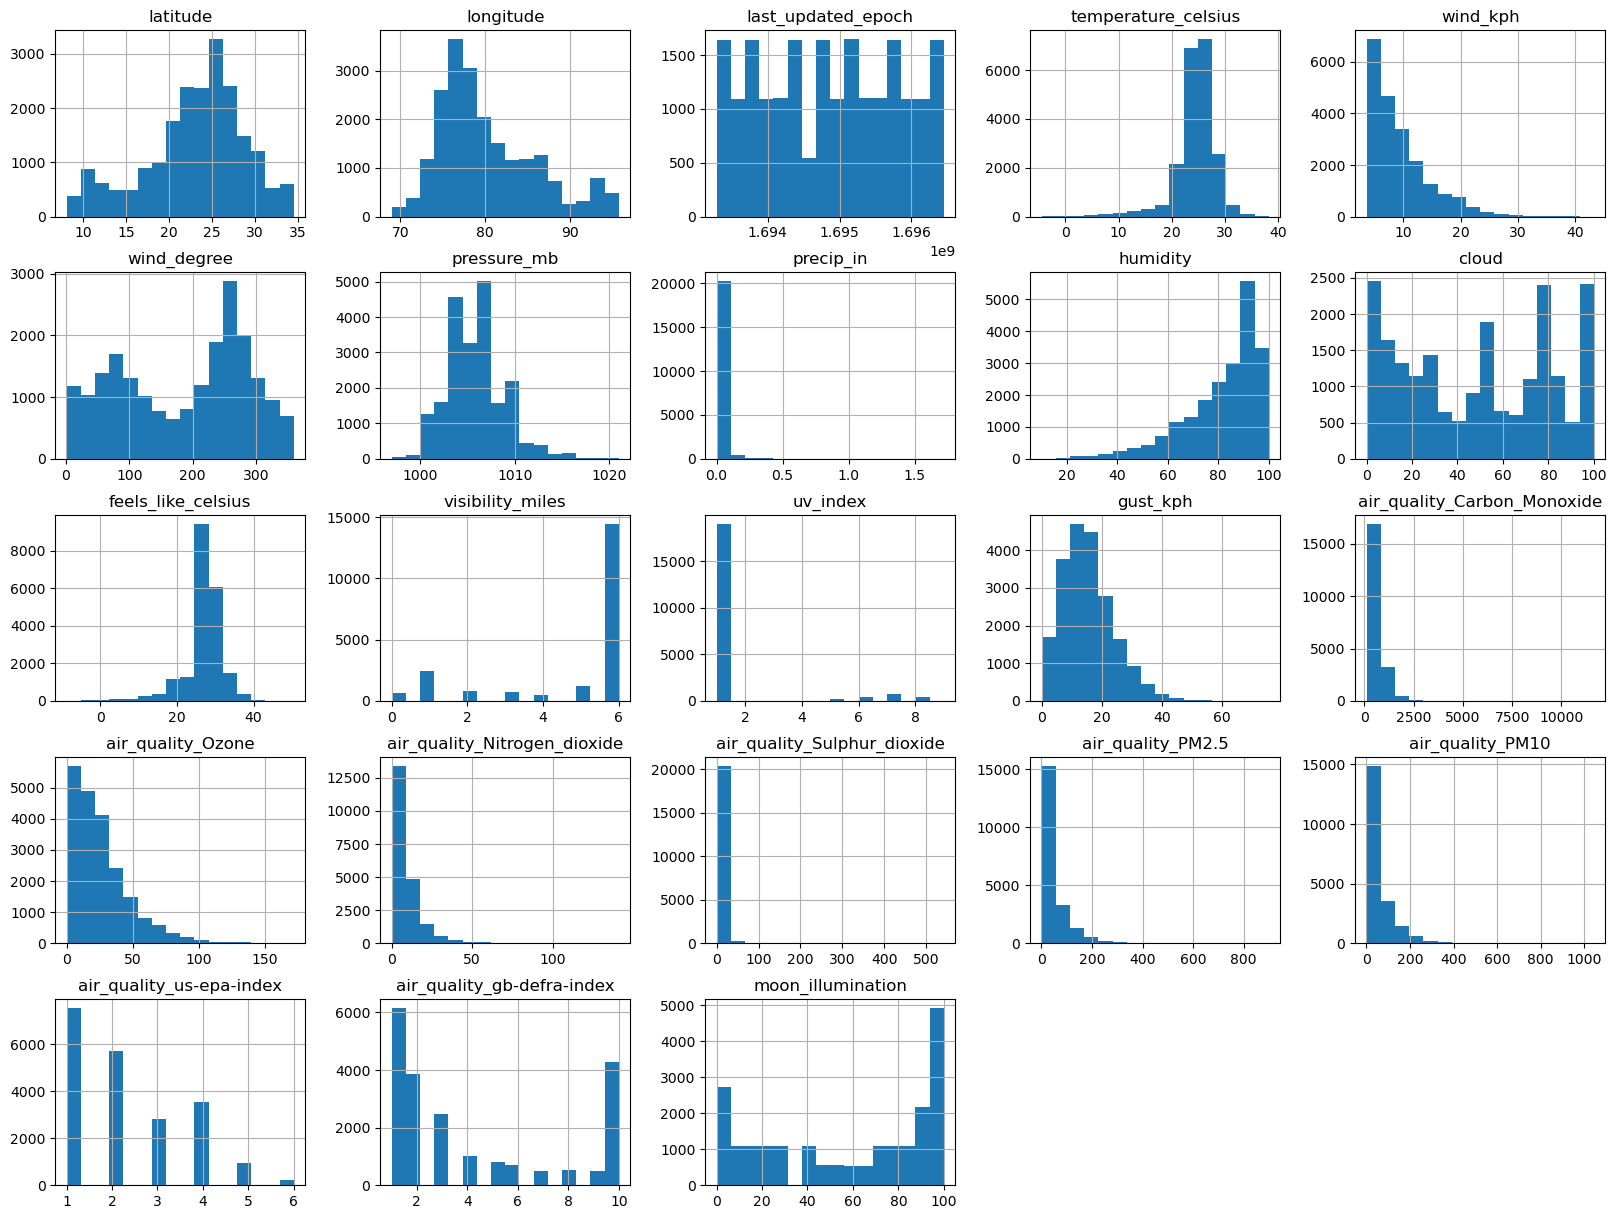

In [6]:
weather_df.hist(bins=16, figsize=(20,15));

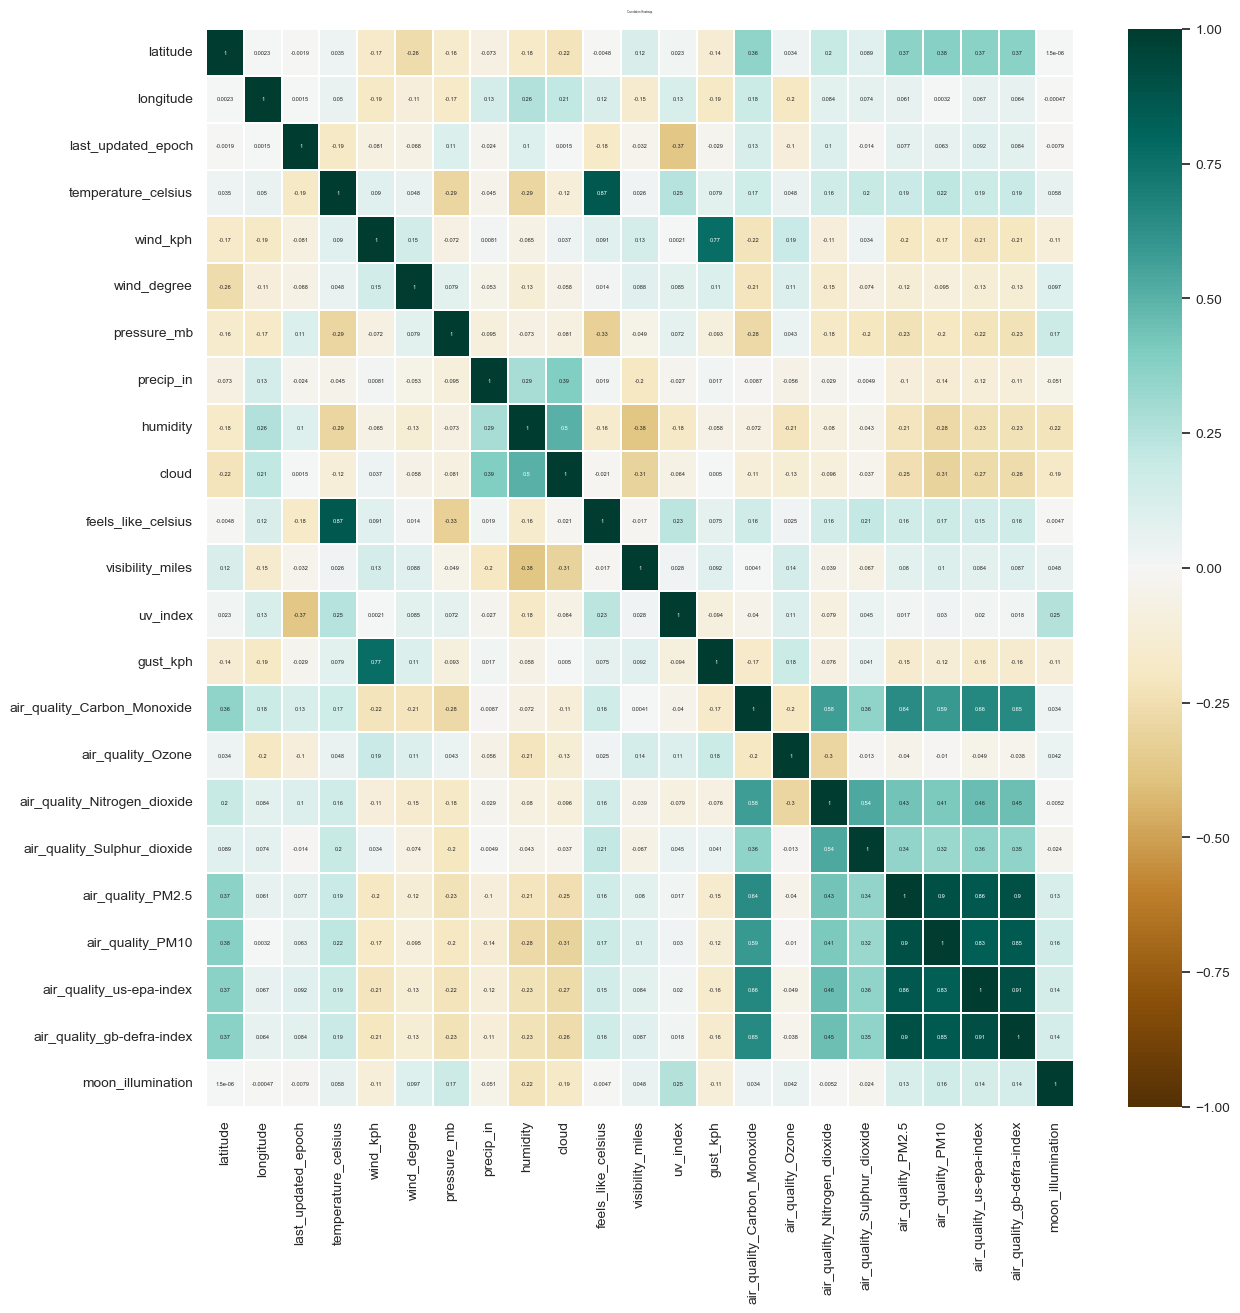

In [7]:
#Creating a correlation matrix
sns.set(font_scale=0.9)

corr_matrix = weather_df.corr(method="kendall")

plt.figure(figsize=(14, 14))
heatmap= sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True,cmap='BrBG',annot_kws={"fontsize":4},linewidths=0.1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':2}, pad=12);


In [8]:
sorted_corr_mat = corr_matrix.abs().unstack().sort_values()
sorted_corr_mat = sorted_corr_mat.to_frame(name="Correlation")

# Removing highly/ least correlated data (correlation>0.90 && <0.05)
sorted_corr_mat=sorted_corr_mat.drop(sorted_corr_mat[sorted_corr_mat['Correlation']>0.95].index)
sorted_corr_mat=sorted_corr_mat.drop(sorted_corr_mat[sorted_corr_mat['Correlation']<0.05].index)
print("Fields with max correlation are:\n")

sorted_corr_mat[sorted_corr_mat['Correlation']>0.80]

Fields with max correlation are:



Correlation
air_quality_PM10           air_quality_us-epa-index       0.830047
air_quality_us-epa-index   air_quality_PM10               0.830047
air_quality_gb-defra-index air_quality_PM10               0.854364
air_quality_PM10           air_quality_gb-defra-index     0.854364
air_quality_us-epa-index   air_quality_PM2.5              0.862881
air_quality_PM2.5          air_quality_us-epa-index       0.862881
feels_like_celsius         temperature_celsius            0.867111
temperature_celsius        feels_like_celsius             0.867111
air_quality_PM10           air_quality_PM2.5              0.900910
air_quality_PM2.5          air_quality_PM10               0.900910
                           air_quality_gb-defra-index     0.903349
air_quality_gb-defra-index air_quality_PM2.5              0.903349
                           air_quality_us-epa-index       0.910930
air_quality_us-epa-index   air_quality_gb-defra-index     0.910930

In [9]:
import plotly.express as px

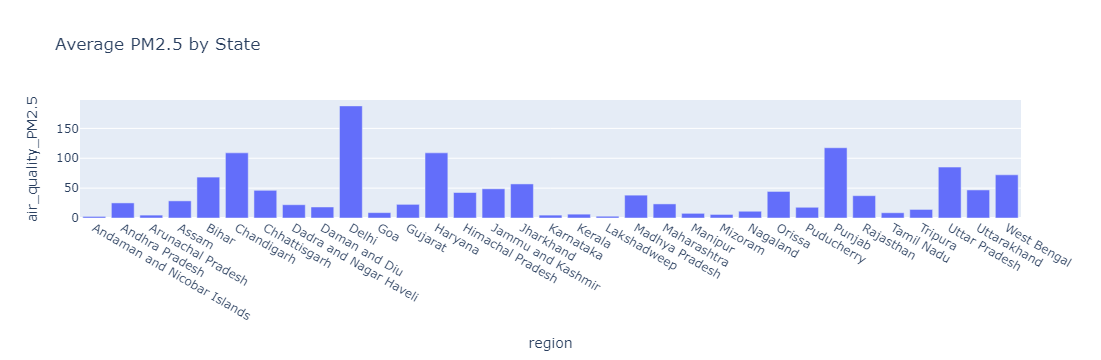

In [10]:
# Average PM2.5 exposure

fig1=px.bar(weather_data.groupby('region')['air_quality_PM2.5'].mean().reset_index(),
           x='region', y='air_quality_PM2.5', 
           title='Average PM2.5 by State')
fig1.show()

In [11]:
# Average UV exposure

fig2=px.bar(weather_data.groupby('region')['uv_index'].mean().reset_index(), x='region', y='uv_index', title='Average uv_index exposure by State')
fig2.show()

In [12]:
# UV index scatterplot
fig3 = px.scatter(weather_data, x='uv_index', y='temperature_celsius', color='region',
                 title='Correlation Between UV Index and Temperature by Region',
                 labels={'uv_index': 'UV Index', 'temperature_celsius': 'Temperature (Celsius)'})

fig3.update_layout(xaxis_title='UV Index', yaxis_title='Temperature (Celsius)')

fig3.show()

In [13]:
# Temperature 
fig4=px.bar(weather_data.groupby('region')['temperature_celsius'].mean().reset_index(), x='region', y='temperature_celsius', title='Average temperature exposure by State')
fig4.show()

C:\Users\kmmur\.conda\envs\new_environment_name\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\kmmur\.conda\envs\new_environment_name\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\kmmur\.conda\envs\new_environment_name\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



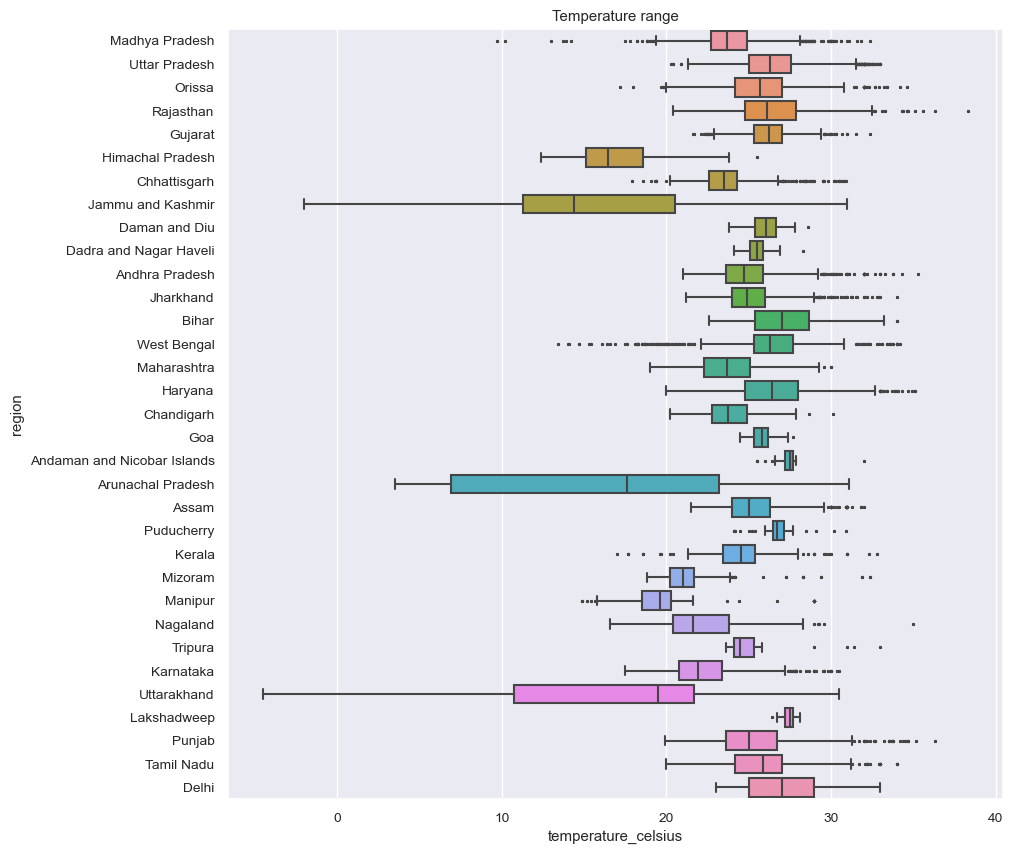

In [14]:
# Temperature range
plt.figure(figsize=(10, 10))
temp_range=sns.boxplot(data=weather_data, y='region', x='temperature_celsius', 
                       flierprops={'marker': '*', 'markersize': 2, 'markerfacecolor': 'blue'})
temp_range.set_title("Temperature range")

plt.show()

# Ploting Temperature vs various air quality metrices (Scaled)

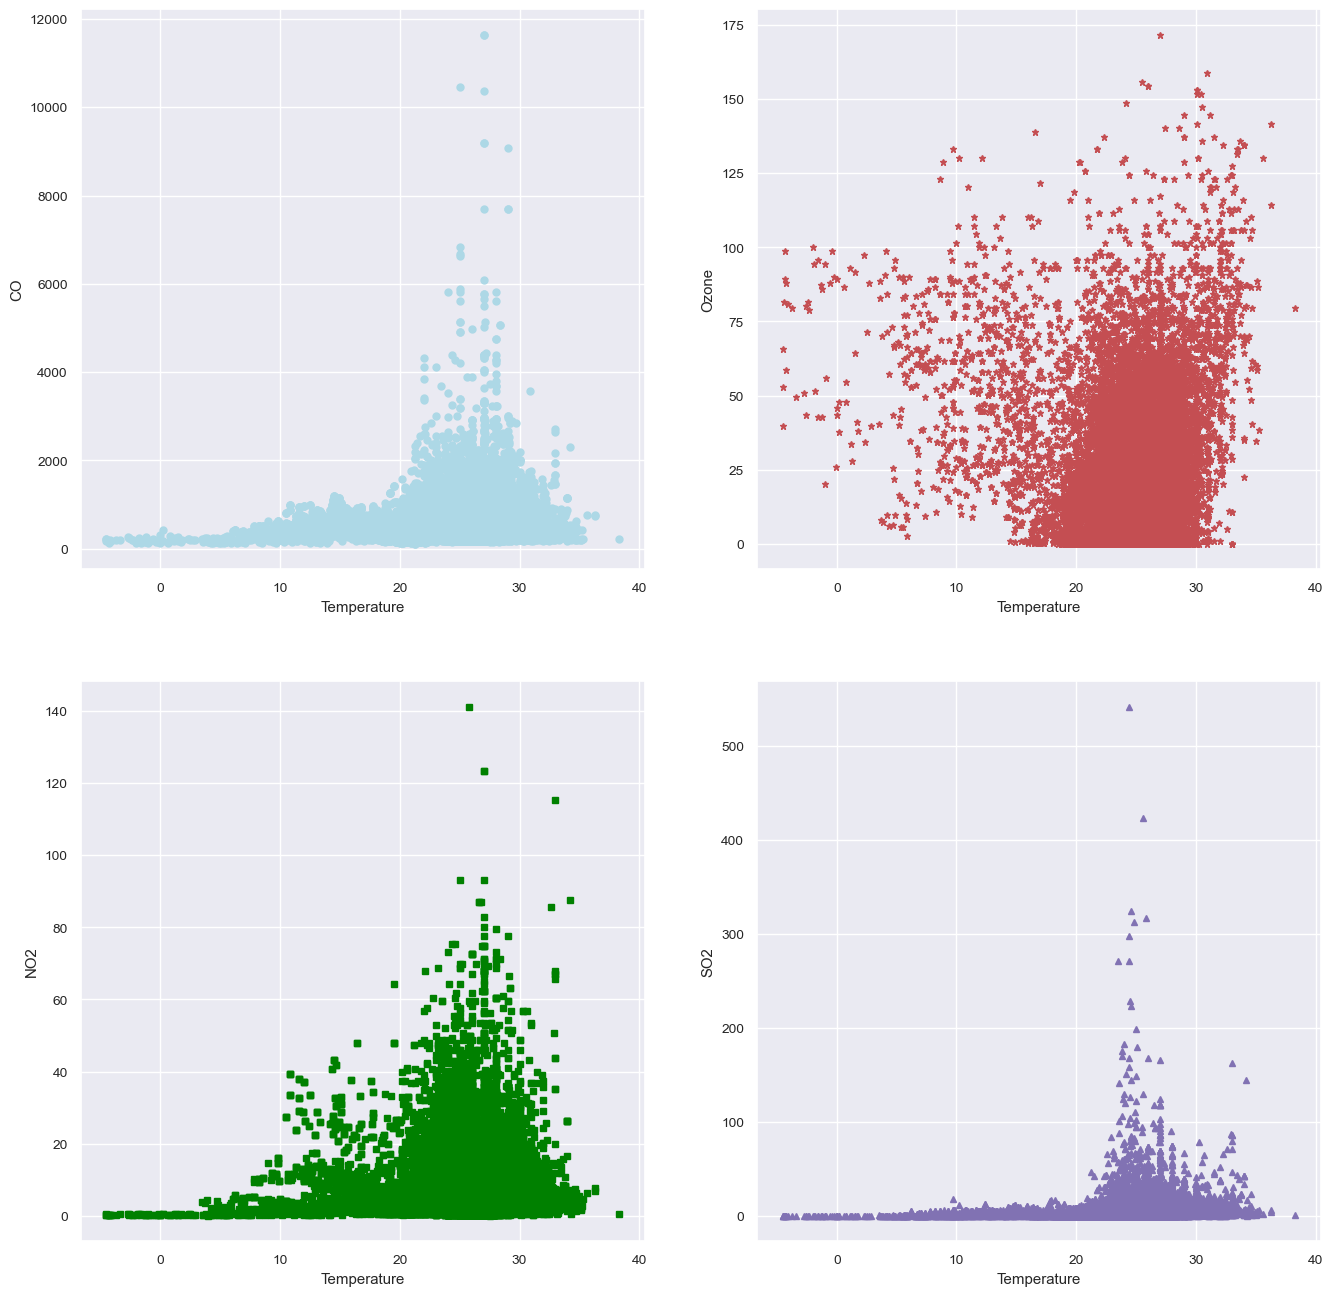

In [15]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

temp_weather=weather_data


# Scatter Plots for Air Quality Metrics vs Temperature
air_quality_metrics = ['air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 
                       'air_quality_Sulphur_dioxide']

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.plot( "temperature_celsius","air_quality_Carbon_Monoxide", data=temp_weather,color="lightblue",marker='o',ms="5",ls = '',label="CO")
plt.xlabel("Temperature")
plt.ylabel("CO")

plt.subplot(2, 2, 2)
plt.plot( "temperature_celsius","air_quality_Ozone", data=temp_weather,color="r",marker='*',ms="5",ls = '',label="Ozone")
plt.xlabel("Temperature")
plt.ylabel("Ozone")

plt.subplot(2, 2, 3)
plt.plot( "temperature_celsius","air_quality_Nitrogen_dioxide", data=temp_weather,color="green",marker='s',ms="5",ls = '',label="NO2")
plt.xlabel("Temperature")
plt.ylabel("NO2")

plt.subplot(2, 2, 4)
plt.plot( "temperature_celsius","air_quality_Sulphur_dioxide", data=temp_weather,color="m",marker='^',ms="5",ls = '',label="SO2")
plt.xlabel("Temperature")
plt.ylabel("SO2")

plt.show()

In [16]:
weather_df.columns

Index(['latitude', 'longitude', 'last_updated_epoch', 'temperature_celsius',
       'wind_kph', 'wind_degree', 'pressure_mb', 'precip_in', 'humidity',
       'cloud', 'feels_like_celsius', 'visibility_miles', 'uv_index',
       'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index', 'moon_illumination'],
      dtype='object')

# Comparing various models that can be used to predict temparature

In [17]:
temperature_data = weather_df['temperature_celsius']
temperature_factors = weather_df[['latitude','longitude','wind_kph','wind_degree','pressure_mb','precip_in','humidity','cloud']]

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(temperature_factors, temperature_data, test_size = 0.3, random_state = 0)

In [19]:
#shapes of splitted data
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (14553, 8)
X_test: (6238, 8)
Y_train: (14553,)
Y_test: (6238,)


# Model 1 : MultiLinear Regression

In [20]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()
linreg.fit(x_train,y_train)

y_pred=linreg.predict(x_test)

model_accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %model_accuracy)

 Accuracy of the model is 51.28


# Model 2 : LASSO Regression

In [21]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(x_train, y_train)

y_pred=lasso.predict(x_test)

model_accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %model_accuracy)

 Accuracy of the model is 48.86


# Model 3: Decision Tree Based Regression

In [22]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)

y_pred=regressor.predict(x_test)

model_accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %model_accuracy)

 Accuracy of the model is 86.57


# Model 4: Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,random_state=0)

regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

model_accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %model_accuracy)

 Accuracy of the model is 93.71


# Model 5: SGD

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_booster = GradientBoostingRegressor(
    n_estimators=500,learning_rate=0.1,random_state=100,
    max_features=5,loss='squared_error',)
gradient_booster.fit(x_train, y_train)

y_pred=gradient_booster.predict(x_test)

model_accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %model_accuracy)

 Accuracy of the model is 91.12
